In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('QVI_data.csv')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [3]:
print("Duplicate rows:", df.duplicated().sum())
df.info()

Duplicate rows: 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [4]:
#Quick info
print(f"Data loaded: {len(df)} rows")
print(f"Date range: {df['DATE'].min()} to {df['DATE'].max()}")
print(f"Number of stores: {df['STORE_NBR'].nunique()}")

Data loaded: 264834 rows
Date range: 2018-07-01 to 2019-06-30
Number of stores: 272


In [5]:
# change the data type of 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.2+ MB


In [6]:
# create a new column "YEAR_MONTH" for easier monthly grouping
df['YEAR_MONTH'] = df['DATE'].dt.to_period('M')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11


## **Main Task**

In [7]:
# Configuration
TRIAL_STORES = [77, 86, 88]  
PRE_TRIAL_END = pd.Timestamp('2019-01-31') 
TRIAL_START = pd.Timestamp('2019-02-01')    
TRIAL_END = pd.Timestamp('2019-04-30')      

#### Create Monthly Store Metrics

In [8]:
from main import monthly_metrics
monthly_data = monthly_metrics(df)


Monthly metrics created:
   STORE_NBR YEAR_MONTH  TOT_SALES  LYLTY_CARD_NBR  TXN_ID  AVG_TXN_PER_CUST
0          1 2018-07-01      206.9              49      52          1.061224
1          1 2018-08-01      176.1              42      43          1.023810
2          1 2018-09-01      278.8              59      62          1.050847
3          1 2018-10-01      188.1              44      45          1.022727
4          1 2018-11-01      192.6              46      47          1.021739


#### Find control stores for each trial stores & Visualize Pre-Trial Comparison


Finding control store for Trial Store 77
Number of Control candidates: 269

Best Control Store: 233 (Score: 0.9734)


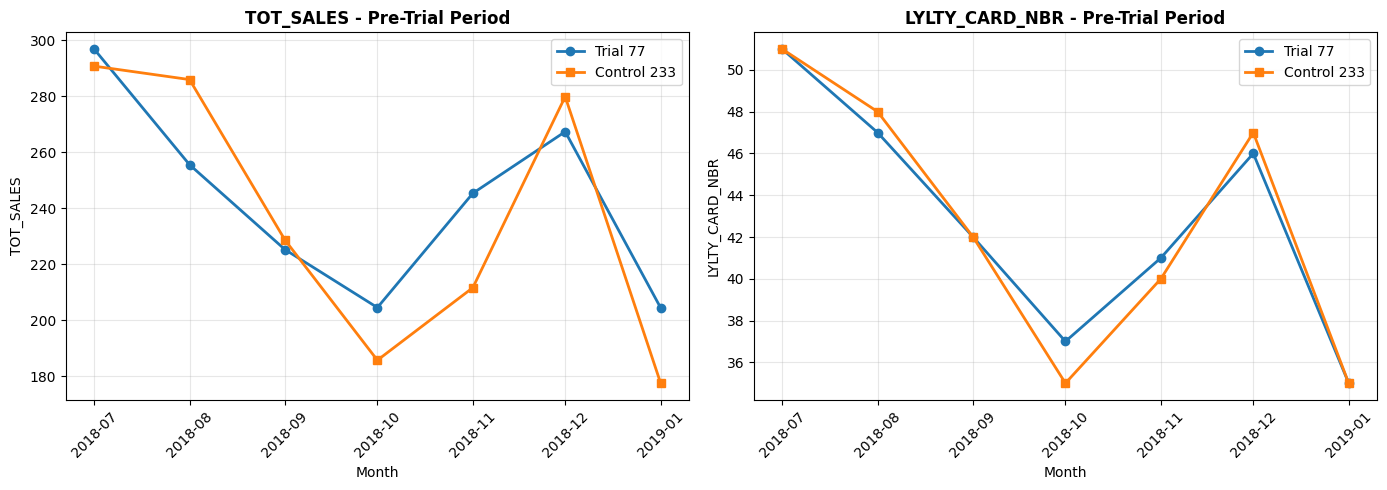

Trial Period Analysis: Store 77 (trial) vs Store 233 (control)

Trial Period Performance Analysiss:
          metric  trial_total  control_total  difference  pctg_difference
       TOT_SALES   777.000000     601.700000  175.300000        29.134120
  LYLTY_CARD_NBR   142.000000     115.000000   27.000000        23.478261
AVG_TXN_PER_CUST     1.040426       1.056481   -0.016056        -1.519757

Key Insights:
• Sales difference: +29.1% vs control store
• PRIMARY DRIVER: Customer count (+23.5%)
• Secondary factor: Transactions per customer (-1.5%)


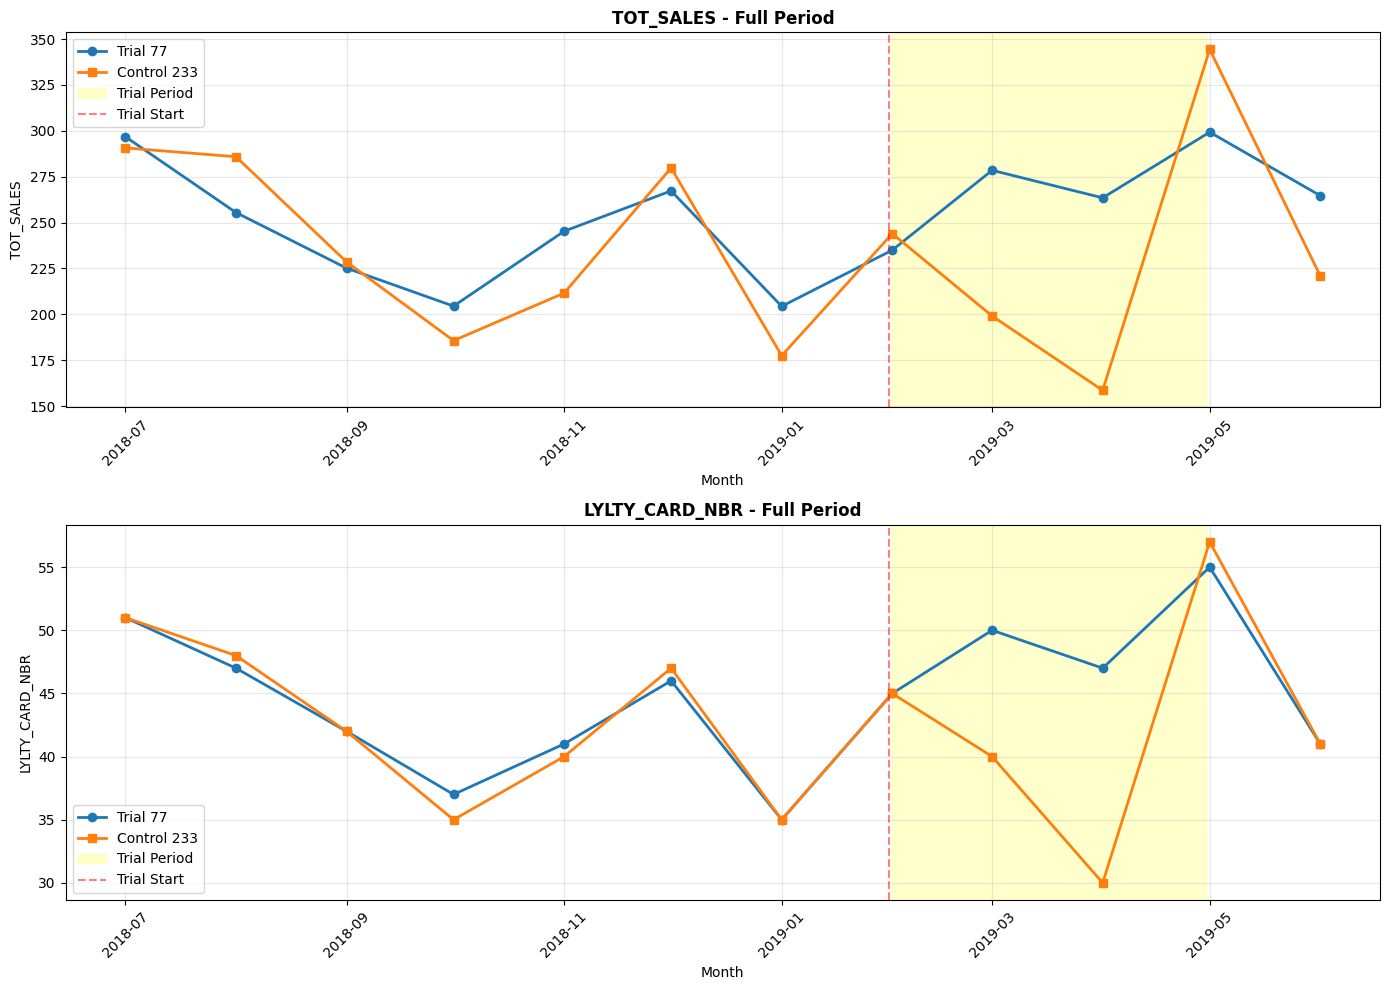


Finding control store for Trial Store 86
Number of Control candidates: 269

Best Control Store: 155 (Score: 0.9216)


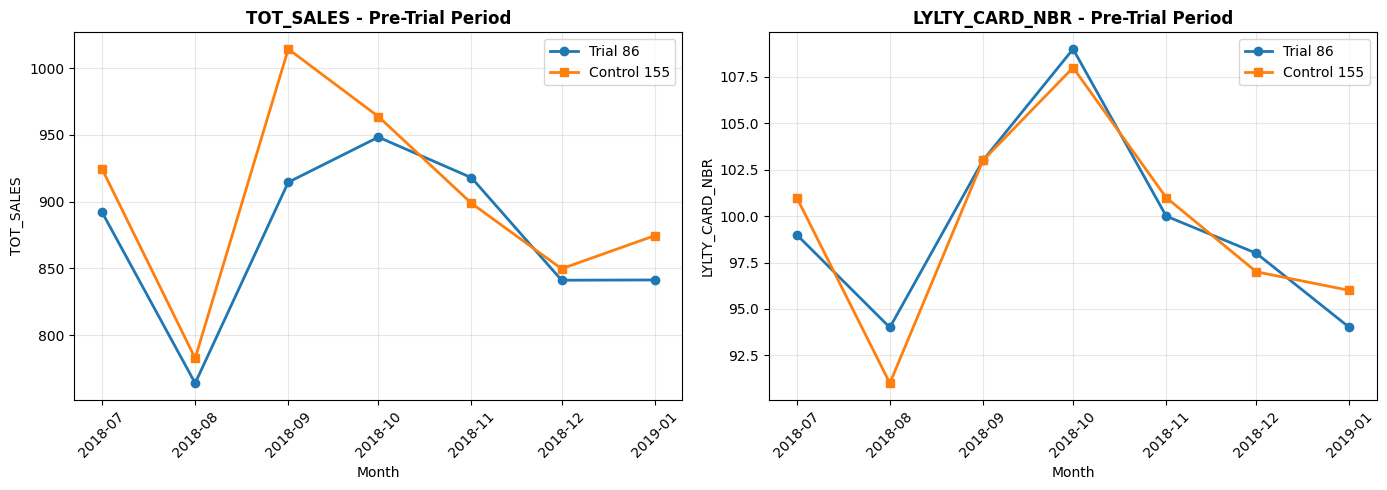

Trial Period Analysis: Store 86 (trial) vs Store 155 (control)

Trial Period Performance Analysiss:
          metric  trial_total  control_total  difference  pctg_difference
       TOT_SALES  2788.200000    2540.200000  248.000000         9.763011
  LYLTY_CARD_NBR   327.000000     288.000000   39.000000        13.541667
AVG_TXN_PER_CUST     1.247791       1.278553   -0.030763        -2.406059

Key Insights:
• Sales difference: +9.8% vs control store
• PRIMARY DRIVER: Customer count (+13.5%)
• Secondary factor: Transactions per customer (-2.4%)


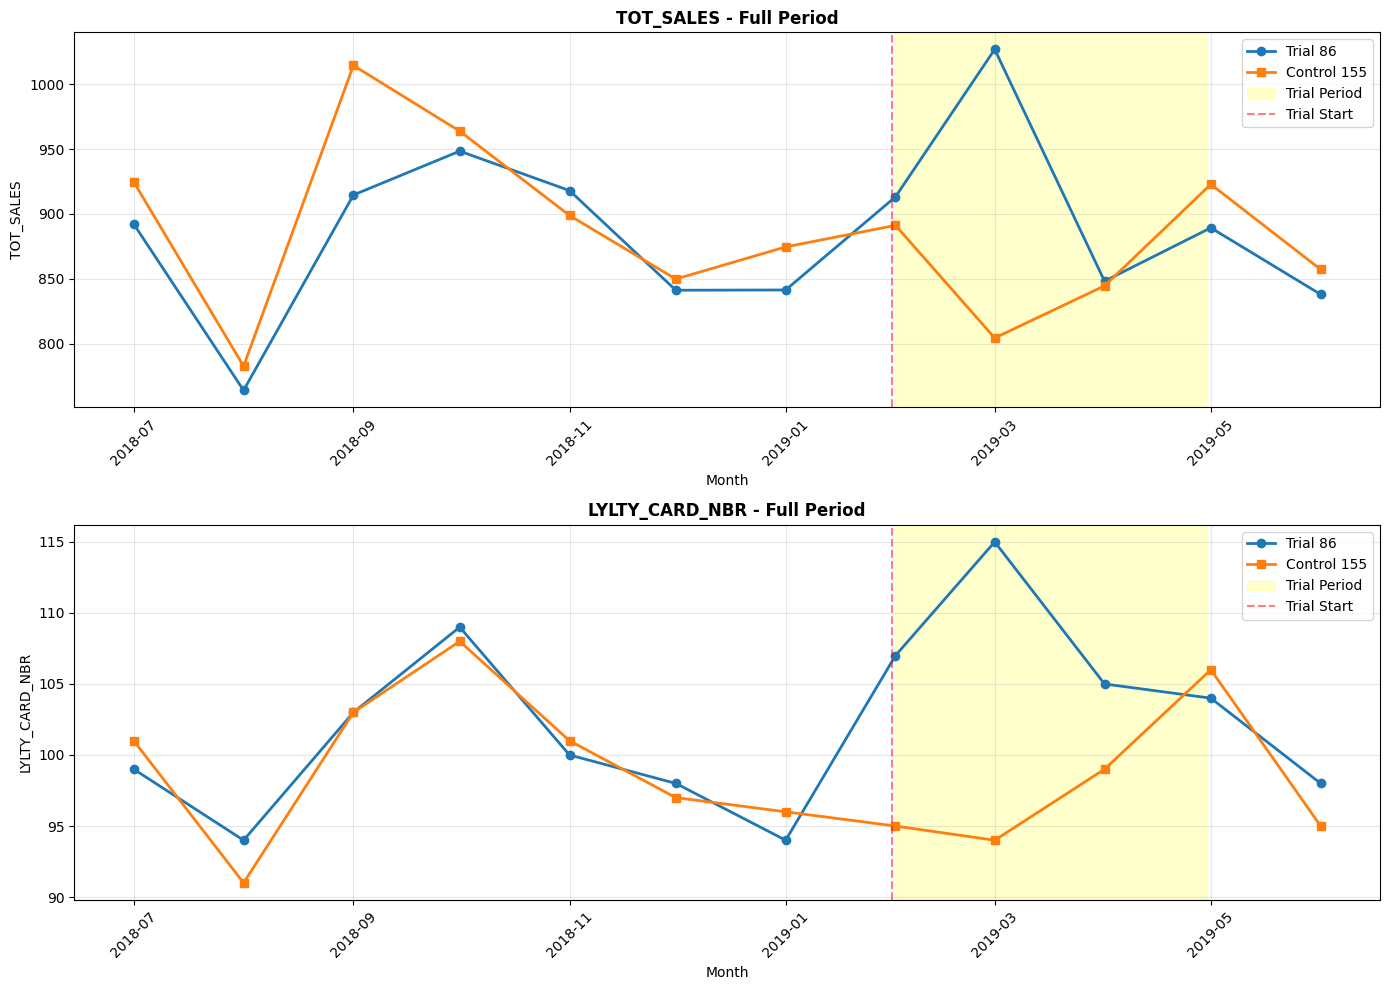


Finding control store for Trial Store 88
Number of Control candidates: 269

Best Control Store: 237 (Score: 0.8188)


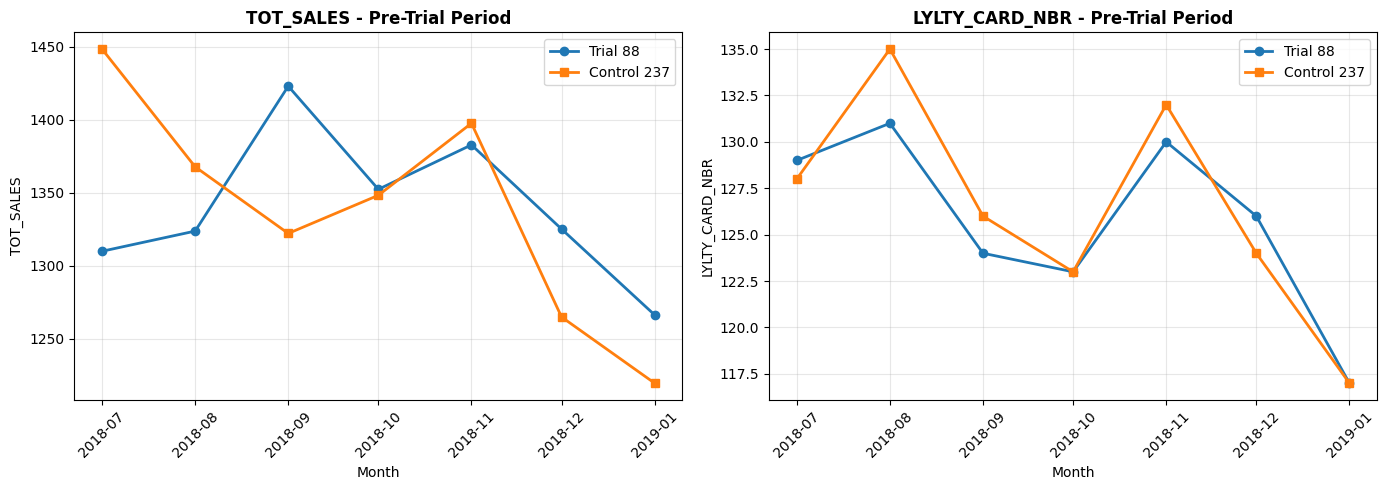

Trial Period Analysis: Store 88 (trial) vs Store 237 (control)

Trial Period Performance Analysiss:
          metric  trial_total  control_total  difference  pctg_difference
       TOT_SALES  4286.800000    3817.600000  469.200000        12.290444
  LYLTY_CARD_NBR   386.000000     365.000000   21.000000         5.753425
AVG_TXN_PER_CUST     1.258739       1.176875    0.081864         6.956037

Key Insights:
• Sales difference: +12.3% vs control store
• PRIMARY DRIVER: Transactions per customer (+7.0%)
• Secondary factor: Customer count (+5.8%)


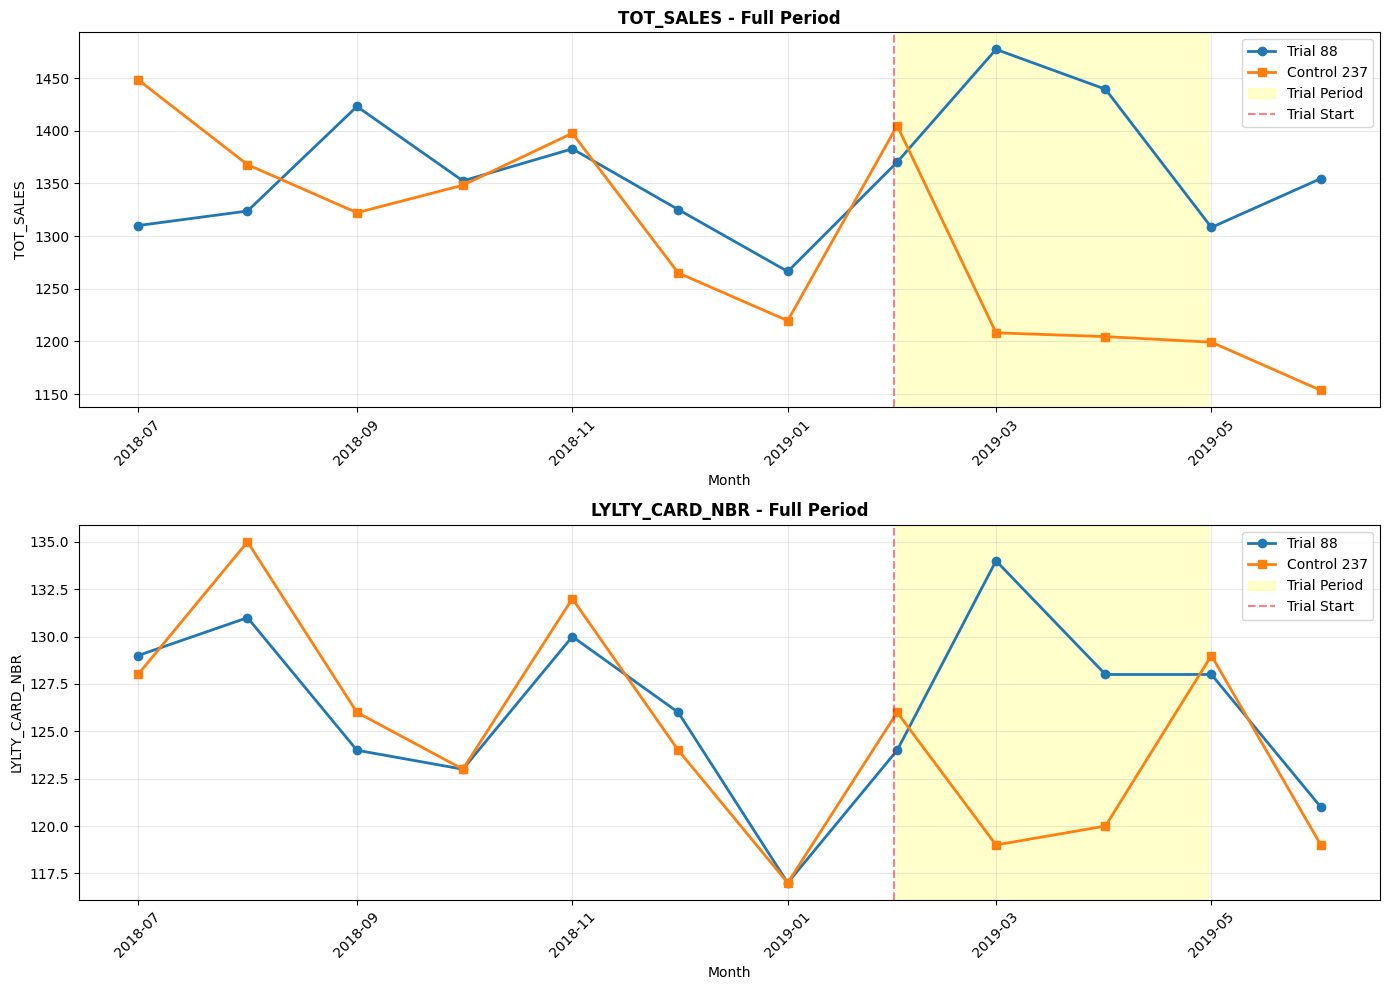

In [9]:
import main as m

for trial_store in TRIAL_STORES:
    # Find best control store
    best_control, results = m.find_control_store(
        trial_store=trial_store,
        measure_data=monthly_data,
        pre_trial_end=PRE_TRIAL_END,
        trial_stores=TRIAL_STORES
    )
    # Visualize pre-trial comparison
    m.plot_pre_trial_comparison(
        trial_store=trial_store,
        control_store=best_control,
        measure_data=monthly_data,
        pre_trial_end=PRE_TRIAL_END
    )

    # Analyze trial period
    m.analyze_trial_period(
        trial_store=trial_store,
        control_store=best_control,
        measure_data=monthly_data,
        trial_start=TRIAL_START,
        trial_end=TRIAL_END
    )

    # Visualize trial period analysis
    m.plot_trial_period_analysis(
        trial_store=trial_store,
        control_store=best_control,
        measure_data=monthly_data,
        pre_trial_end=PRE_TRIAL_END,
        trial_start=TRIAL_START,
        trial_end=TRIAL_END
    )